In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
dx = np.random.rand(1000)
mask = np.random.rand(1000) > 0.95

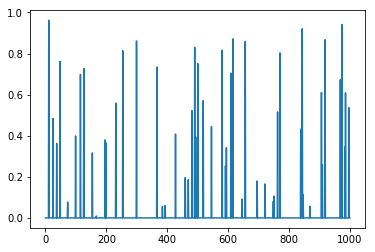

In [46]:
dx = dx * mask
plt.plot(dx)

In [47]:
# RMSProp update
rmsprop_x = list()
x = 0.0
cache = 0.0
decay_rate = 0.99
learning_rate = 0.01
eps = 1e-8
for delta in dx:
    cache = cache * decay_rate + (1 - decay_rate) * delta**2
    x += -learning_rate * delta/(np.sqrt(cache) + eps)
    rmsprop_x.append(x)

In [48]:
# adam
learning_rate=0.01
beta1=0.9
beta2=0.999
m = 0.0
v = 0.0
x= 0.0
adam_x = list()
for delta in dx:
    m = beta1*m + (1-beta1)*delta
    v = beta2*v + (1-beta2)*(delta**2)
    x += - learning_rate * m / (np.sqrt(v) + eps)
    adam_x.append(x)

In [49]:
# vanilla stochastic gradient
x = 0.0
learning_rate = 0.01
sgd_x = list()
for delta in dx:
    x += -learning_rate * delta
    sgd_x.append(x)

In [50]:
# momentum
x = 0.0
mu = 0.0
v = 0.0
learning_rate = 0.01
momentum_x = list()
for delta in dx:
    v = mu * v - learning_rate * delta
    x += v
    momentum_x.append(x)

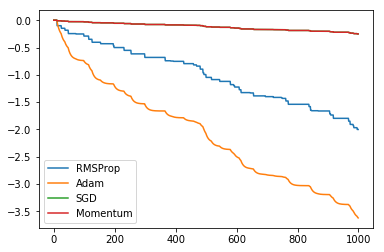

In [51]:
fig, ax = plt.subplots()
ax.plot(rmsprop_x, label="RMSProp")
ax.plot(adam_x, label="Adam")
ax.plot(sgd_x, label="SGD")
ax.plot(momentum_x, label="Momentum")
ax.legend()